<a href="https://colab.research.google.com/github/SaiTeja-555/dl_projects/blob/main/Disease_Detection_Mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabavathmurari","key":"819ee1b45c6e1afbabc492e4df20859d"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c paddy-disease-classification

100% 1.02G/1.02G [00:40<00:00, 32.7MB/s]
100% 1.02G/1.02G [00:40<00:00, 27.0MB/s]


In [ ]:
! unzip '/content/paddy-disease-classification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train_images/downy_mildew/100992.jpg  
  inflating: train_images/downy_mildew/100995.jpg  
  inflating: train_images/downy_mildew/101015.jpg  
  inflating: train_images/downy_mildew/101020.jpg  
  inflating: train_images/downy_mildew/101022.jpg  
  inflating: train_images/downy_mildew/101024.jpg  
  inflating: train_images/downy_mildew/101034.jpg  
  inflating: train_images/downy_mildew/101050.jpg  
  inflating: train_images/downy_mildew/101078.jpg  
  inflating: train_images/downy_mildew/101096.jpg  
  inflating: train_images/downy_mildew/101103.jpg  
  inflating: train_images/downy_mildew/101114.jpg  
  inflating: train_images/downy_mildew/101119.jpg  
  inflating: train_images/downy_mildew/101142.jpg  
  inflating: train_images/downy_mildew/101177.jpg  
  inflating: train_images/downy_mildew/101178.jpg  
  inflating: train_images/downy_mildew/101181.jpg  
  inflating: train_images/downy_mildew/101205.jpg  
  inflating: 

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow.keras.layers as tfl
from PIL import Image
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.preprocessing import image_dataset_from_directory

import glob as gb
import cv2
import keras

In [ ]:
df = pd.read_csv('/content/train.csv')

df["label"].value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

In [ ]:
code = {'normal':0 ,'blast':1,'hispa':2,'dead_heart':3,'tungro':4,'brown_spot':5 , 'downy_mildew':6 ,'bacterial_leaf_blight':7 , 'bacterial_leaf_streak':8 ,'bacterial_panicle_blight':9  }

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [ ]:
train_path = '/content/train_images/'
test_path = '/content/test_images/'

In [ ]:
s = 150
X = []
y = []
for folder in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path  + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X.append(list(image_array))
        y.append(code[folder])

print(f'we have {len(X)} items in X')

we have 10407 items in X


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,  shuffle=True, random_state=42)

X_test, X_validate, y_test, y_validate = train_test_split(X_valid, y_valid, test_size=0.5,  shuffle=True, random_state=42)

In [ ]:
del X
del y

del X_valid
del y_valid

In [ ]:
X_train = X_train/255.0

X_test = X_test/255.0

X_validate = X_validate/255.0

# for i in range(len(X_train)):
#   for j in range(len(X_train[i])):
#     X_train[i][j] = X_train[i][j]/255.0

# for i in range(len(X_test)):
#   for j in range(len(X_test[i])):
#     X_test[i][j] = X_test[i][j]/255.0

# for i in range(len(X_validate)):
#   for j in range(len(X_validate[i])):
#     X_validate[i][j] = X_validate[i][j]/255.0

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Flatten,Dropout
import tensorflow 
from tensorflow.keras.applications import MobileNetV2

model= Sequential()
model.add(MobileNetV2(include_top=False,pooling='avg', weights = 'imagenet'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(10, activation='softmax'))

model.layers[0].trainable = False


model.compile(loss = 'sparse_categorical_crossentropy', 
               optimizer = 'adam',
               metrics = ['acc'])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,588,490
Trainable params: 330,506
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=16,
         validation_data=(X_validate, y_validate),epochs=25)

Epoch 1/25
521/521 [==============================] - 20s 19ms/step - loss: 1.5934 - acc: 0.4662 - val_loss: 1.2174 - val_acc: 0.6023
Epoch 2/25
521/521 [==============================] - 7s 14ms/step - loss: 1.1132 - acc: 0.6253 - val_loss: 0.9685 - val_acc: 0.6849
Epoch 3/25
521/521 [==============================] - 8s 14ms/step - loss: 0.8877 - acc: 0.7043 - val_loss: 0.8482 - val_acc: 0.7157
Epoch 4/25
521/521 [==============================] - 8s 14ms/step - loss: 0.7663 - acc: 0.7384 - val_loss: 0.7537 - val_acc: 0.7493
Epoch 5/25
521/521 [==============================] - 8s 15ms/step - loss: 0.6474 - acc: 0.7823 - val_loss: 0.6976 - val_acc: 0.7762
Epoch 6/25
521/521 [==============================] - 8s 15ms/step - loss: 0.5624 - acc: 0.8106 - val_loss: 0.6290 - val_acc: 0.7925
Epoch 7/25
521/521 [==============================] - 8s 14ms/step - loss: 0.4894 - acc: 0.8357 - val_loss: 0.6082 - val_acc: 0.7983
Epoch 8/25
521/521 [==============================] - 10s 19ms/step 

In [ ]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=16)
print("test loss, test acc:", results)

Evaluate on test data
66/66 [==============================] - 1s 14ms/step - loss: 0.6671 - acc: 0.8377
test loss, test acc: [0.6670733690261841, 0.8376560807228088]


Text(0, 0.5, 'Loss')

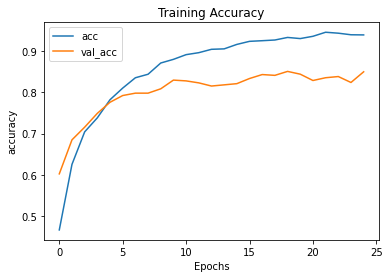

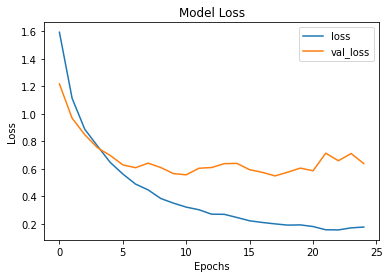

In [ ]:
# converting hsitory to dataframe
pd.DataFrame(history.history)

pd.DataFrame(history.history)[['acc', 'val_acc']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
y_pred = model.predict(X_test)

33/33 [==============================] - 2s 27ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, np.argmax(y_pred, axis=1) ) )

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       172
           1       0.83      0.89      0.86       187
           2       0.84      0.83      0.84       163
           3       0.91      0.87      0.89       146
           4       0.88      0.85      0.86       104
           5       0.83      0.85      0.84        84
           6       0.98      0.67      0.79        81
           7       0.52      0.64      0.57        36
           8       0.91      0.78      0.84        27
           9       0.86      0.76      0.81        41

    accuracy                           0.84      1041
   macro avg       0.84      0.80      0.81      1041
weighted avg       0.85      0.84      0.84      1041



In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


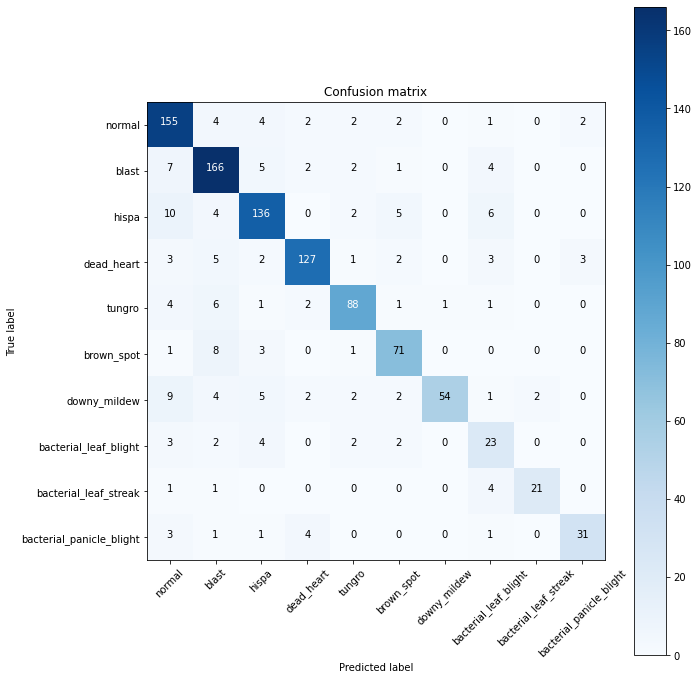

In [ ]:
cnf_matrix = confusion_matrix(y_test, np.argmax(y_pred,axis = 1))
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix,
            classes=[                            
            'normal',
            'blast',
            'hispa',
            'dead_heart',
            'tungro',
            'brown_spot',
            'downy_mildew' ,
            'bacterial_leaf_blight' ,
            'bacterial_leaf_streak',
            'bacterial_panicle_blight'
            ],
            title='Confusion matrix'
          )
plt.show()

In [ ]:
model.save("mobilenet.h5")

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model("/content/mobilenet.h5")

In [ ]:
from keras.utils.image_utils import img_to_array
from tensorflow.keras.preprocessing import image
img_path = "/content/test_images/200005.jpg"
img = image.load_img(img_path, target_size = (s, s))
img_arr = image.img_to_array(img)
np_img = np.array(img_arr)/255.0
npp_img = np.expand_dims(np_img, axis=0)
# print(npp_img)
result = model1.predict(npp_img)
print(result, np.argmax(result))

[[[[0.6156863  0.76862746 0.654902  ]
   [0.627451   0.7764706  0.6862745 ]
   [0.7607843  0.89411765 0.83137256]
   ...
   [0.9137255  1.         0.84705883]
   [0.7137255  0.8509804  0.5921569 ]
   [0.8392157  0.9098039  0.7058824 ]]

  [[0.6431373  0.79607844 0.68235296]
   [0.63529414 0.78431374 0.69411767]
   [0.7058824  0.8392157  0.7764706 ]
   ...
   [0.74509805 0.8509804  0.6745098 ]
   [0.8156863  0.9607843  0.65882355]
   [0.91764706 0.98039216 0.73333335]]

  [[0.7019608  0.85490197 0.7411765 ]
   [0.63529414 0.78431374 0.69411767]
   [0.6666667  0.8        0.7372549 ]
   ...
   [0.8666667  0.9882353  0.8666667 ]
   [0.8509804  0.9882353  0.7764706 ]
   [0.9372549  0.96862745 0.8235294 ]]

  ...

  [[0.42352942 0.5647059  0.50980395]
   [0.4117647  0.5529412  0.49803922]
   [0.43137255 0.57254905 0.5176471 ]
   ...
   [0.34901962 0.4862745  0.39215687]
   [0.3529412  0.49019608 0.39607844]
   [0.3529412  0.49019608 0.39607844]]

  [[0.42745098 0.5686275  0.5137255 ]
   [0.4

In [ ]:
preds = np.argmax(y_pred, axis = 1)

NameError: ignored

In [ ]:
for i in range(len(preds)):
  print(preds[i], y_test[i])

2 4
2 2
0 2
0 0
4 4
5 5
4 4
9 9
7 0
6 7
2 2
1 1
9 9
5 5
9 9
3 3
3 3
2 2
5 5
4 2
0 0
0 0
2 2
3 3
0 0
9 9
2 2
1 1
2 2
3 3
0 0
7 7
0 0
0 0
1 1
1 1
3 3
6 6
5 5
5 5
1 7
0 0
1 1
5 5
5 5
8 8
6 6
3 3
6 6
1 1
3 3
1 1
1 1
1 3
3 3
7 7
3 3
0 0
5 5
2 2
3 3
4 4
4 0
0 0
0 0
6 6
0 0
6 6
1 1
3 3
2 2
0 0
4 2
2 2
7 5
3 3
2 2
1 1
3 3
2 2
0 0
4 4
2 0
6 6
5 5
6 6
3 3
0 0
9 9
0 0
2 2
5 3
1 5
3 0
4 4
4 1
2 2
0 0
9 9
2 2
8 8
6 6
7 7
8 8
0 0
1 1
0 0
0 0
7 7
5 5
2 2
4 4
2 8
2 2
0 0
3 3
1 1
6 6
1 1
7 7
0 0
2 2
4 2
6 6
0 0
0 0
7 4
1 1
0 0
3 3
4 4
1 1
0 0
0 0
1 1
5 5
1 1
9 9
8 8
0 0
8 8
9 9
0 0
2 3
6 6
0 0
0 1
6 6
3 3
6 6
1 1
0 4
1 1
0 0
7 1
2 2
1 1
1 1
0 0
3 3
5 5
0 0
5 5
3 3
0 0
6 4
2 2
9 9
1 1
2 2
4 2
9 9
3 7
2 9
7 7
7 7
3 3
0 0
4 4
3 3
1 1
7 7
0 0
2 2
1 1
9 9
5 5
0 0
1 7
0 0
1 1
4 4
3 3
5 5
3 3
0 0
0 0
1 1
2 2
4 4
2 2
0 0
2 2
1 1
0 0
7 7
8 8
3 3
0 0
3 9
0 0
1 1
8 8
0 0
2 2
1 1
0 0
8 8
3 3
6 6
1 1
1 1
1 7
0 0
1 1
1 1
6 6
2 2
1 1
2 2
7 7
2 4
6 6
3 3
2 2
1 1
2 2
0 0
1 1
4 4
9 9
0 0
0 0
1 1
9 0
1 1
2 2
2 2
0 0
0 0
